In the second half of this book, we will discuss high-level programming concepts in the context of the C programming language

**Overview of 1st half of book:**
- LC-3 - simple computer
- basic idea behind all computers - simple elements are systematically interconnected to form more sophisticated devices
    - MOS transistors are connected to build logic gates
    - Logic gates are used to build memory and data path elements
    - Memory and data path elements are interconnected to build the LC-3
- After describing the hardware of the LC-3, we described how to program it in the 1s and 0s of its native machine language, followed by assembly language
- low-level TRAP subroutines perform commonly needed tasks, such as input and output, on behalf of the programmer

The concepts of systematic decomposition and subroutines are important not only for assembly-level programming but also for programming in a high-level language.

---

In this chapter, we make the transition from programming in low-level assembly language to high-level language programming in C

We'll explain why high-level languages came about, why they are important, and how they interact with the lower levels of the computing system

## 11.2 Bridging the Gap
As computing hardware becomes faster and more powerful, software applications become more complex and sophisticated. New generations of computer systems spawn new generations of software that can do more powerful things than previous generations.

As the software gets more sophisticated, the job of developing it becomes more difficult. To keep the programmer from being quickly overwhelmed, it is critical that the process of programming be kept as simple as possible. Automating any part of this process (i.e., having the computer do part of the work) is a welcome enhancement.

machine language -> assembly language: 1s and 0s became mnemonics, and memory addresses became symbolic labels
- Both instructions and memory addresses took on a form more comfortable for the human than for the machine

High-level languages 
- allow us to give symbolic names to values
- provide expressiveness
- provide an abstraction of the underlying hardware
    - high-level languages provide a uniform interface independent of underlying ISA or hardware
    - will generate necessary code to carry out the operation whenever the programmer uses it
- enhance code readability
- provide safeguards against bugs

## 11.3 Translating High-Level Language Programs 
Just as LC-3 assembly language programs need to be translated (or more specifically, assembled) into machine language, so must all programs written in
high-level languages

How this translation is done depends on the particular high-level language.

1. **interpretation** - a translation program called an **interpreter** reads in the high-level language program and performs the operations indicated by the programmer.
- The high-level language program does not directly execute but rather is executed by the interpreter program.

2. **compilation** - the translator, called a **compiler**, completely translates the high-level language program into machine language.
- The output of the compiler is called the executable image, and it can directly execute on the hardware.

Keep in mind that both interpreters and compilers are themselves programs running on the computer system. 


### 11.3.3 Pros and Cons 
**interpretation pros**:
- developing and debugging a program is usually easier
- the execution of a program one section (single line, for example) at a time allows the programmer to examine intermediate results and make code modifications on-the-fly
- Often the debugging is easier with interpretation.
- more easily portable across different computing systems

**interpretation cons**:
- programs take longer to execute because there is an intermediary, the interpreter, which is actually doing the work

**compilation pros**:
- With the compiler's assistance, the programmer can produce code that executes more quickly and uses memory more efficiently
- Since compilation produces more efficient code, most commercially produced software tends to be programmed in compiled languages

## 11.4 The C Programming Language 
1972 by Dennis Ritchie at Bell Laboratories

developed for use in writing compilers and operating systems

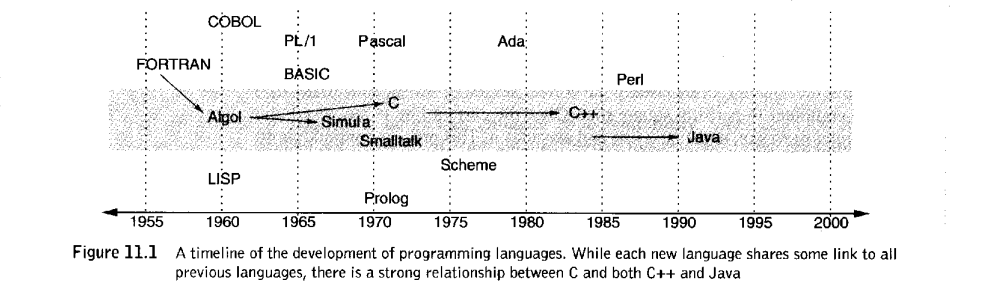

The language allows the programmer to manipulate data items at a very low level yet still provides the expressiveness and convenience of a high-level language. It is for these reasons that C is very widely used today as more than just a language to develop compilers and system software.  

can only surely say that all previous languages have some influence on a particular language

it is fairly clear that C had a direct influence on C++ and Java, both of which are two of the more significant languages today. 
- C++ and Java were also influenced by Simula and its predecessors. 
- The object-oriented features of C++ and Java come from these languages. 
- Almost all of the aspects of the C programming language that we discuss in this textbook would be the same if we were programming in C++ or Java. 
- Once you've understood the concepts in this half of the textbook, both C++ and Java will also be easier to master because of their similarity to C

### 11.4.1 The C Compiler 
The C compiler is the typical mode of translation from a C source program to an **executable image**

**Recall:** an executable image is a machine language representation of a program that is ready to be loaded into memory and executed

The entire compilation process involves the **preprocessor**, the **compiler** itself, and the **linker**. Often, the entire mechanism is casually referred to as the compiler, because when we use the C compiler, the preprocessor and the linker are often automatically invoked



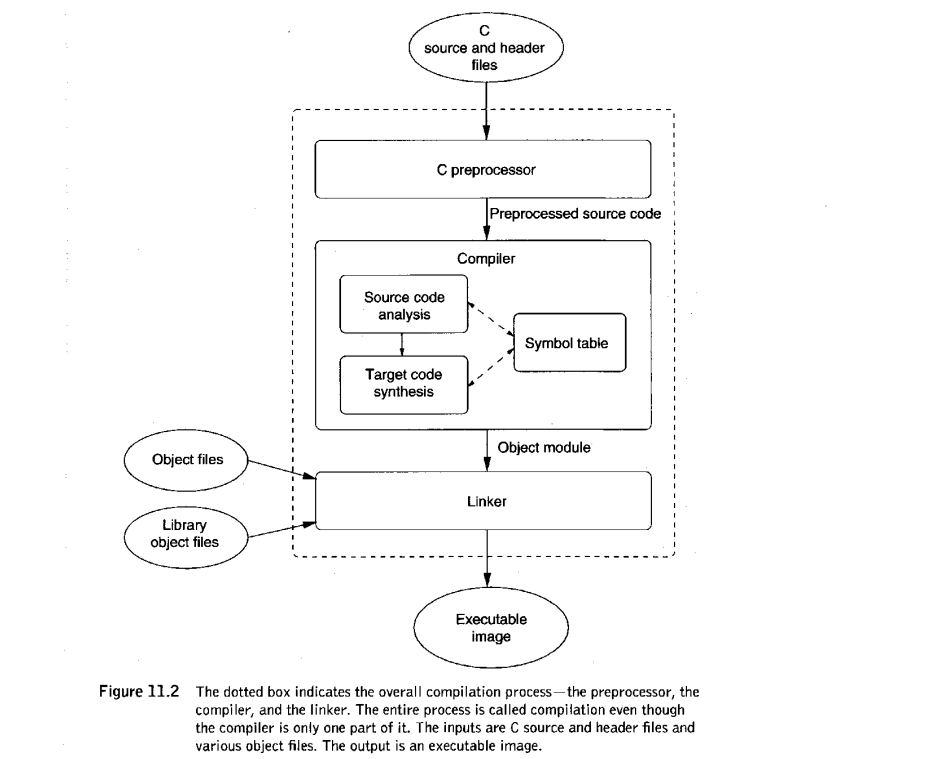

#### The Preprocessor 
"preprocesses" the C program before handing it off to the compiler

scans through the source files (the source files contain the actual C program) looking for and acting upon C preprocessor directives
- These directives are similar to pseudo-ops in LC-3 assembly language. They instruct the preprocessor to transform the C source file in some controlled manner. For example, we can direct the preprocessor to substitute the character string DAYS THIS MONTH with the string 3 0 or direct it to insert the contents of file stdio.h into the source file at the current line. 

All useful C programs rely on the preprocessor in some way

#### The Compiler 
The compiler transforms the preprocessed program into an **object module**
- Recall: an object module is the machine code for one section of the entire program.

**There are two major phases of compilation:**
- **analysis** - source program is broken down or parsed into its constituent parts
- **synthesis** - a machine code version of the program is generated

- It is the job of the analysis phase to read in, parse, and build an internal representation of the original program. 
- The synthesis phase generates machine code and, if directed, attempts to optimize this code to execute more quickly and efficiently on the computer on which it will be run.

One of the most important internal bookkeeping mechanisms the compiler uses in translating a program is the symbol table. A symbol table is the compiler's internal bookkeeping method for keeping track of all the symbolic names the programmer has used in the program.

#### The Linker 
links together all object modules to form an executable image of the program

**The executable image is a version of the program that can be loaded into memory and executed by the underlying hardware**
- When you click on the icon for the web browser on your PC, for example, you are instructing the operating system to read the web browser's executable image from your hard drive, load it into memory, and start executing it. 

Often, C programs rely upon library routines. Library routines perform common and useful tasks (such as I/O) and are prepared for general use by the developers of the system software (the operating system and compiler, for example). If a program uses a library routine, then the linker will find the object code corresponding to the routine and link it within the final executable image.

## 11.5 A Simple Example
if you are using a Windows-based PC, then it is likely that your compiler will generate x86 code (the ISA)

### 11.5.1 The Function main 
begins at the line containing int main () and ends at the closing brace

These lines of the source code constitute a function definition for the function named main

What were called subroutines in LC-3 assembly language programming (discussed in Chapter 9) are referred to as functions in C

In C, the function `main` serves a special purpose: It is where execution of the program begins.
- Every C program, therefore, requires a function main.
- Note that in ANSI C, main must be declared to return an integer value.
- That is, main must be of type int

In [2]:
# /*
# *
# * Program Name : countdown, our first C program
# *
# * Description : This program prompts the user to type in
# * a positive number and counts down from that number to 0,
# * displaying each number along the way.
# *
# */

# /* The next two lines are preprocessor directives */
# #include <stdio.h>
# #define STOP 0

# /* Function : main */
# /* Description : prompt for input, then display countdown */
# int main()
# {
# /* Variable declarations */
# int counter; /* Holds intermediate count values */
# int startPoint; /* Starting point for count down */
 
# /* Prompt the user for input */
# printf(»===== Countdown Program =====\n");
# printf("Enter a positive integer: ");
# scanf("%d", &startPoint);

# /* Count down from the input number to 0 */
# for (counter = startPoint; counter >= STOP; counter--)
# printf("%d\nn, counter);
# } 

For all C programs, execution starts in main and progresses, statement by statement, until the last statement in main is completed.

In C, semicolons are used to terminate declarations and statements; they are necessary for the compiler to break the program down unambiguously into its constituents. 

### 11.5.2 Formatting, Comments, and Style
C is a free-format language. That is, the amount of spacing between words and between lines within a program does not change the meaning of the program.

### 11.5.3 The C Preprocessor 
transforms the original C program before it is handed off to the compiler.

two commonly used preprocessor directives: `#define` and `#inciude`.

##### The `#define` directive is a simple yet powerful directive that instructs the C preprocessor to replace occurrences of any text that matches X with text Y. 

Examples:

    #define NUMBER_OF_STUDENTS 25
    #define MAX_LENGTH 80
    #define LENGTH_OF_GAME 3 00
    #define PRICE_OF_FUEL 1.49
    #define COLOR_OF_EYES brown 

The common programming style is to use uppercase for the macro name

##### The `#include` directive instructs the preprocessor literally to insert another file into the source file

Essentially, the #include directive itself is replaced by the contents of another file.

For instance, all programs that use the C I/O functions must include the I/O library's header file s t dio. h. This file defines some relevant information about the I/O functions in the C library. The preprocessor directive, #include <stdio. h> is used to insert the header file before compilation begins.

There are two variations of the #include directive:

    #include <stdio. h>
    #include "program.h"

*The first variation uses angle brackets (< >) around the filename. This tells the preprocessor that the header file can be found in a predefined directory.

The second variation, using double quotes (" ") around the filename, instructs the preprocessor that the header file can be found in the same directory as the C source file.

### 11.5.4 Input and Output 
We close this chapter by pointing out how to perform input and output from within a C program. We describe these functions at a high level now and save the details for Chapter 18, when we have introduced enough background material to understand C I/O down to a low level.

**Since all useful programs perform some form of I/O, learning the I/O capabilities of C is an important first step**

In C, I/O is performed by library functions, similar to the IN and OUT trap routines provided by the LC-3 system software.

`printf` performs output to the standard output device, which is typically the monitor. 

It requires a format string in which we provide two things: 
1. text to print out and 
2. specifications on how to print out values within that text

All format specifications begin with the percent sign, %

The number of format specifications (for example, %d) must equal the number of values that follow the format string.

The function `scanf` performs input from the standard input device, which is typically the keyboard.

A very important thing to remember about scanf is that variables that are being modified by the scanf function (for example, startPoint) must be preceded by an `&` character. This may seem a bit mysterious, but we will discuss the reason for this strange notation in Chapter 16.

**More examples of scanf:**

    /* Reads in a character and stores it in nextChar */
    scanf ("%c", &nextChar) ;
    
    /* Reads in a floating point number into radius */
    scanf("%f", &radius) ;
    
    /* Reads two decimal numbers into length and width */
    scanf ("%d %d", &length, &width) ;

## 11.6 Summary:
1. High-level languages aim to make the programming process easier by connecting real-world objects with the lowlevel concepts, such as bits and operations on bits, that a computer natively deals with

-- Because computers can only execute machine code, programs in high-level languages must be translated using the process of compilation or interpretation into machine code.

2. The C compilation process involves a preprocessor, a compiler, and a linker

3. Many C programs use the preprocessor macros #def ine and #include.

4. The execution of a C program begins at the function main, which itself consists of variable declarations and statements.

5. Finally, I/O in C can be accomplished using the library functions printf and scanf.